In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'D:\\Hackathon\\Machinehack\\ODI_Participants_Data'

In [2]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
submission=pd.read_excel('Sample_submission.xlsx')

In [3]:
train.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner
0,5,4,37,4,Home,Away,Second,First,Dec,4
1,1,14,84,7,Neutral,Neutral,First,Second,Sep,1
2,9,15,47,9,Home,Away,First,Second,Feb,9
3,7,2,102,6,Home,Away,First,Second,Aug,2
4,6,8,46,5,Home,Away,First,Second,Aug,6


In [4]:
train.shape

(2508, 10)

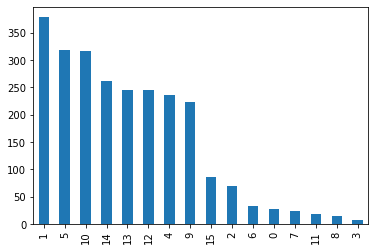

In [5]:
train.MatchWinner.value_counts().plot.bar()

In [6]:
test.head()

,Team1,Team2,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch
0,2,4,34,1,Home,Away,First,Second,Oct
1,14,1,19,15,Home,Away,First,Second,Mar
2,9,10,130,14,Neutral,Neutral,Second,First,Dec
3,9,10,8,9,Home,Away,First,Second,Dec
4,5,15,130,14,Neutral,Neutral,First,Second,Oct


In [7]:
def team_dummy(df):
    dum=df[['Team1','Team2']]
    dum=dum.astype(str)
    dummy=dum.stack().str.get_dummies().sum(level=0)
    dummy=dummy.astype(int)
    df=pd.concat([df,dummy],1)
    df.drop(['Team1','Team2'],1,inplace=True)
    return df

In [8]:
train=team_dummy(train)
test=team_dummy(test)

In [9]:
total=pd.concat([train,test])
total.shape

(3583, 24)

In [10]:
total.head()

,Stadium,HostCountry,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner,0,1,...,14,15,2,3,4,5,6,7,8,9
0,37,4,Home,Away,Second,First,Dec,4.0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,84,7,Neutral,Neutral,First,Second,Sep,1.0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,47,9,Home,Away,First,Second,Feb,9.0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,102,6,Home,Away,First,Second,Aug,2.0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,46,5,Home,Away,First,Second,Aug,6.0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [11]:
dummy=pd.get_dummies(total['HostCountry'],prefix='HostCountry_')
total=pd.concat([total,dummy],1)
total.drop('HostCountry',1,inplace=True)
total.head()

,Stadium,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner,0,1,10,...,HostCountry__7,HostCountry__8,HostCountry__9,HostCountry__10,HostCountry__11,HostCountry__12,HostCountry__13,HostCountry__14,HostCountry__15,HostCountry__16
0,37,Home,Away,Second,First,Dec,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,84,Neutral,Neutral,First,Second,Sep,1.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,47,Home,Away,First,Second,Feb,9.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,102,Home,Away,First,Second,Aug,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,Home,Away,First,Second,Aug,6.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
cat=total.select_dtypes(object).columns.to_list()
cat

['Team1_Venue',
 'Team2_Venue',
 'Team1_Innings',
 'Team2_Innings',
 'MonthOfMatch']

In [13]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for items in cat:
    total[items]=le.fit_transform(total[items])

In [14]:
total.head()

,Stadium,Team1_Venue,Team2_Venue,Team1_Innings,Team2_Innings,MonthOfMatch,MatchWinner,0,1,10,...,HostCountry__7,HostCountry__8,HostCountry__9,HostCountry__10,HostCountry__11,HostCountry__12,HostCountry__13,HostCountry__14,HostCountry__15,HostCountry__16
0,37,1,0,1,0,2,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,84,2,2,0,1,11,1.0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,47,1,0,0,1,3,9.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,102,1,0,0,1,1,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,1,0,0,1,1,6.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train_final=total[:train.shape[0]]
test_final=total[train.shape[0]:]

In [16]:
train_final.shape

(2508, 40)

In [17]:
test_final.shape

(1075, 40)

In [18]:
X=train_final.drop('MatchWinner',1)
y=train.MatchWinner
test_final=test_final.drop('MatchWinner',1)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [20]:
from xgboost import XGBClassifier
model_2 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=1,
 colsample_bytree=0.8,
 seed=100,
 eval_metric='mlogloss'
 )
#model.fit(X_train, y_train)
model_2.fit(X_train, y_train, eval_metric='mlogloss', 
          eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=100)

[0]	validation_0-mlogloss:2.74013
Will train until validation_0-mlogloss hasn't improved in 100 rounds.
[100]	validation_0-mlogloss:1.41568
[200]	validation_0-mlogloss:1.02574
[300]	validation_0-mlogloss:0.851673
[400]	validation_0-mlogloss:0.763041
[500]	validation_0-mlogloss:0.713589
[600]	validation_0-mlogloss:0.684331
[700]	validation_0-mlogloss:0.665575
[800]	validation_0-mlogloss:0.655909
[900]	validation_0-mlogloss:0.650354
[1000]	validation_0-mlogloss:0.647969
[1100]	validation_0-mlogloss:0.64751
[1200]	validation_0-mlogloss:0.647675
Stopping. Best iteration:
[1102]	validation_0-mlogloss:0.647416



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='mlogloss',
              gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=5000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=100,
              silent=None, subsample=1, verbosity=1)

In [21]:
model_xgb=XGBClassifier(
 learning_rate =0.01,
 n_estimators=1100,
 max_depth=1,
 colsample_bytree=0.8,
 seed=100
 )
model_xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=1100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=100,
              silent=None, subsample=1, verbosity=1)

In [22]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(X=X,y=y,estimator=model_xgb,scoring='neg_log_loss',cv=5)

In [23]:
score

array([-0.61470854, -0.6084379 , -0.62946576, -0.64161022, -0.62545583])

In [24]:
np.mean(score)

-0.6239356493999123

In [26]:
y_pred=model_xgb.predict_proba(test_final)

In [27]:
submission=pd.DataFrame(y_pred)

In [28]:
submission.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000586,0.001013,0.277486,0.000512,0.708607,0.001200,0.000674,0.001080,0.000556,0.001125,0.001325,0.000519,0.001031,0.001523,0.001491,0.001272
1,0.000299,0.509556,0.001083,0.000262,0.000509,0.000573,0.000349,0.000551,0.000284,0.000574,0.000513,0.000265,0.000581,0.000718,0.483345,0.000539
2,0.000508,0.000818,0.000910,0.000589,0.000680,0.000761,0.000727,0.000553,0.000938,0.388481,0.600618,0.000694,0.000871,0.000809,0.001205,0.000838
3,0.000326,0.000576,0.001180,0.000285,0.000514,0.000601,0.000544,0.000418,0.000309,0.554786,0.437157,0.000533,0.000617,0.000787,0.000911,0.000457
4,0.000742,0.001164,0.001397,0.000862,0.001051,0.776596,0.000724,0.001157,0.001371,0.001210,0.001502,0.000594,0.001283,0.001082,0.001603,0.207660


In [29]:
test=pd.read_csv('Test.csv')

In [30]:
for i in range(submission.shape[0]):
    team1=test.iloc[i]['Team1']
    team2=test.iloc[i]['Team2']
    if submission.iloc[i][team1] > submission.iloc[i][team2]:
        submission.iloc[i][team1]=1-submission.iloc[i][team2]
    else:
        submission.iloc[i][team2]=1-submission.iloc[i][team1]

In [31]:
submission.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000586,0.001013,0.277486,0.000512,0.722514,0.001200,0.000674,0.001080,0.000556,0.001125,0.001325,0.000519,0.001031,0.001523,0.001491,0.001272
1,0.000299,0.516655,0.001083,0.000262,0.000509,0.000573,0.000349,0.000551,0.000284,0.000574,0.000513,0.000265,0.000581,0.000718,0.483345,0.000539
2,0.000508,0.000818,0.000910,0.000589,0.000680,0.000761,0.000727,0.000553,0.000938,0.388481,0.611519,0.000694,0.000871,0.000809,0.001205,0.000838
3,0.000326,0.000576,0.001180,0.000285,0.000514,0.000601,0.000544,0.000418,0.000309,0.562843,0.437157,0.000533,0.000617,0.000787,0.000911,0.000457
4,0.000742,0.001164,0.001397,0.000862,0.001051,0.792340,0.000724,0.001157,0.001371,0.001210,0.001502,0.000594,0.001283,0.001082,0.001603,0.207660


In [32]:
submission[submission<0.05]=0
submission[submission>0.95]=1

In [33]:
submission.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.000000,0.277486,0.0,0.722514,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000
1,0.0,0.516655,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.483345,0.00000
2,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.388481,0.611519,0.0,0.0,0.0,0.000000,0.00000
3,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.0,0.562843,0.437157,0.0,0.0,0.0,0.000000,0.00000
4,0.0,0.000000,0.000000,0.0,0.000000,0.79234,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.20766


In [34]:
submission.to_excel('submission_final.xlsx',index=False)